# The linguistic diversity of Russia always fascinated me, as there are hundrends of languages used in this vast country. Especially, my intention is to research small and endagered languages. For that, I used data from the 2010 Census of the Russian Federation. http://www.gks.ru/free_doc/new_site/perepis2010/croc/perepis_itogi1612.htm . My original file was in xlsx format, so I saved it first to csv. As it was quite dirty, I dropped some initial rows, a useless column while also I renamed my columns from Russian to English. I ended up with two columns, containing languages and the number of people speaking them. I converted the second column to an integer after some more cleaning of some empty rows, and finally I could navigate all these languages... 

# By filtering my dataframe, I found out languages that are spoken, according to the census data, by 10 people of fewer, which I personally find amazing. Yeniseian languages, despite appearing as exctint and formerly spoken by the Yugh people, one of the southern groups along the Yenisei River in central Siberia, are revealed as still existing. Central Siberian Yupik, an endangered Yupik language spoken by five people of the indigenous Siberian Yupik people along the coast of the Chukchi Peninsula in the Russian Far East and in the villages of Savoonga and Gambell in St. Lawrence Island, still lives. Also, Sireniki Yupik, despite being labelled by Wikipedia as 'an extinct Eskimo–Aleut language' spoken 'in and around the village of Sireniki in Chukotka Peninsula, Chukotka Autonomous Okrug, Russia', the data reveal to us 5 remaining speakers... The same case with the Kerek language of Kamtchatka.

# Made some graphs. This would be an excellent place to embark on a fact-finding mission about the people using these languages. Profiling both them and their communities, in the milieu of the latest FT features on how pipeline contruction affects Siberian communities and also of the Siberian life depiction by Werner Herzog. 

# Fun things to have: -A comparison of how these languages evolved from the 2002 census. Tried getting the data and joining them, but they are only in an online format, so could not make it. For now!
 # Language graphs of Dagestan, a Russian region in the Caucasus with crazy language diversity. But the csv was all messed up! (and not sure how to graph these, anyway)

In [ ]:
#A paragraph or two about the work you've done (data sourcing, data cleaning, etc)
#A paragraph or two about your findings
#A list of additional "nice to have" improvements - this can be other graphics, 
#improvements on your existing graphics, or further data analysis.

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
pd.options.display.max_rows = 100

In [18]:
df = pd.read_csv("pub-04-05.csv", encoding='UTF-8')
df

,5. ВЛАДЕНИЕ ЯЗЫКАМИ НАСЕЛЕНИЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,Численность лиц владеющих соответствующим языком,
3,Указавшие владение языком,138312535,
4,Указанные населением,,
5,языки:,,
6,абазинский,37831,
7,абхазский,6786,
8,аварский,715297,
9,агульский,29287,


In [19]:
df.drop(df.index[[0,1,2,3,4,5,113,179,180]], inplace=True)

In [20]:
df.columns

Index(['5. ВЛАДЕНИЕ ЯЗЫКАМИ НАСЕЛЕНИЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ', 'Unnamed: 1',
       'Unnamed: 2'],
      dtype='object')

In [21]:
df.head()

,5. ВЛАДЕНИЕ ЯЗЫКАМИ НАСЕЛЕНИЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ,Unnamed: 1,Unnamed: 2
6,абазинский,37831,
7,абхазский,6786,
8,аварский,715297,
9,агульский,29287,
10,адыгейский,117489,


In [22]:
df = df.drop('Unnamed: 2', 1)

In [23]:
df.head()

,5. ВЛАДЕНИЕ ЯЗЫКАМИ НАСЕЛЕНИЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ,Unnamed: 1
6,абазинский,37831
7,абхазский,6786
8,аварский,715297
9,агульский,29287
10,адыгейский,117489


In [24]:
df.rename(columns={'5. ВЛАДЕНИЕ ЯЗЫКАМИ НАСЕЛЕНИЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ': 'Language spoken in the Russian Federation',
                          'Unnamed: 1': 'People speaking the language',
                          }, 
                 inplace=True)

In [25]:
df.head()

,Language spoken in the Russian Federation,People speaking the language
6,абазинский,37831
7,абхазский,6786
8,аварский,715297
9,агульский,29287
10,адыгейский,117489


In [26]:
df.dtypes

Language spoken in the Russian Federation    object
People speaking the language                 object
dtype: object

In [27]:
df['People speaking the language'].tail(110)

68         25605
69            10
70           213
71         80306
72         70722
73        156099
74         63106
75         42384
76          1665
77           308
78           738
79        426212
80         34699
81        145895
82         40200
83         22079
84        402173
85         31295
86           189
87           507
88          1221
89           938
90        365127
91          1529
92          2025
93         96061
94          8829
95        392941
96          1347
97           125
98            74
99       2069949
100        21926
101          198
102         3356
103        87119
104         4928
105            8
106       451431
107        13073
108        67446
109        11207
110         4649
111        21201
112    137494893
114       120528
115        30360
116          353
117         1023
118        11043
         ...    
129         2012
130          975
131          513
132         2152
133           93
134          229
135       253673
136       1463

In [28]:
df['People speaking the language'] = df['People speaking the language'].astype(int)

In [29]:
df.sort_values(by='People speaking the language')

,Language spoken in the Russian Federation,People speaking the language
173,югский,1
174,юитский,4
119,сиреникский,5
105,орочский,8
69,керекский,10
17,алюторский,25
168,энецкий,43
163,чулымско-тюркский,44
15,алеутский,45
144,уйльта,47


In [35]:
end_lang = df[df['People speaking the language'] <= 10]

In [36]:
end_lang

,Language spoken in the Russian Federation,People speaking the language
69,керекский,10
105,орочский,8
119,сиреникский,5
173,югский,1
174,юитский,4


In [37]:
end_lang.sort_values(by='People speaking the language')

,Language spoken in the Russian Federation,People speaking the language
173,югский,1
174,юитский,4
119,сиреникский,5
105,орочский,8
69,керекский,10


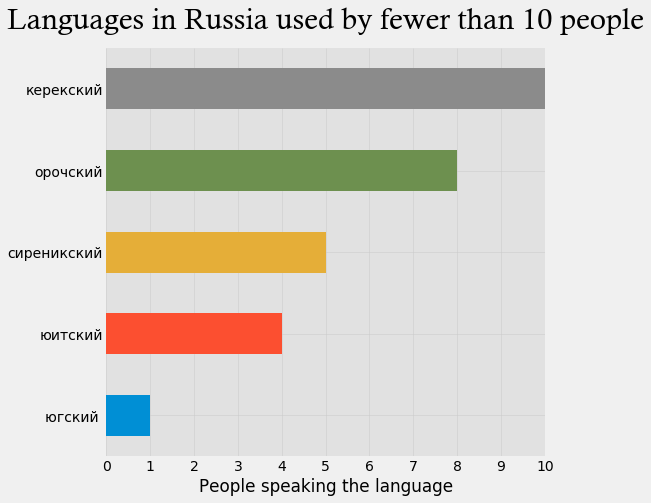

In [63]:
ax = end_lang.sort_values(by='People speaking the language').plot(x='Language spoken in the Russian Federation', y='People speaking the language', kind='barh', figsize=(7,7), legend=False)

ax.set_title ('Languages in Russia used by fewer than 10 people', pad = 20)
ax.legend().set_visible(False)
ax.title.set_fontsize(30)
ax.title.set_fontname('Calisto MT')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

ax.set_xlabel("People speaking the language")

ax.tick_params(which='major', left=False, bottom=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)
ax.set_facecolor('#e1e1e1')

ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.set_xlim(0, 10)
ax.yaxis.label.set_visible(False)

In [48]:
few = df[df['People speaking the language'] < 200]

In [49]:
few.sort_values(by='People speaking the language')

,Language spoken in the Russian Federation,People speaking the language
173,югский,1
174,юитский,4
119,сиреникский,5
105,орочский,8
69,керекский,10
17,алюторский,25
168,энецкий,43
163,чулымско-тюркский,44
15,алеутский,45
144,уйльта,47


,Language spoken in the Russian Federation,People speaking the language
15,алеутский,45
17,алюторский,25
37,водский,68
40,годоберинский,128
54,ижорский,123
61,ительменский,82
69,керекский,10
86,лугово-восточный марийский,189
97,нганасанский,125
98,негидальский,74


In [175]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

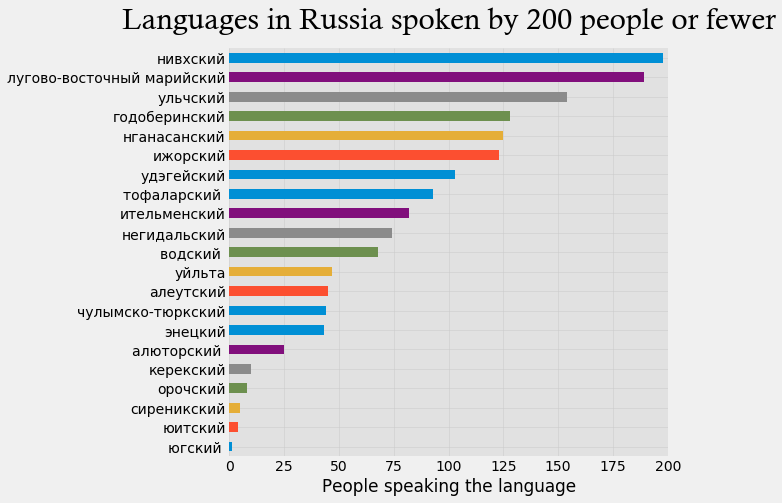

In [61]:
ax = few.sort_values(by='People speaking the language').plot(x='Language spoken in the Russian Federation', y='People speaking the language', kind='barh', figsize=(7,7), legend=False)

ax.set_title ('Languages in Russia spoken by 200 people or fewer', pad = 20)
ax.legend().set_visible(False)
ax.title.set_fontsize(30)
ax.title.set_fontname('Calisto MT')

ax.set_xlabel("People speaking the language")

ax.tick_params(which='major', left=False, bottom=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)
ax.set_facecolor('#e1e1e1')

ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.set_xlim(0, 200)
ax.yaxis.label.set_visible(False)